# 泰塔尼克号数据分析

## 导入常用库

In [129]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 导入数据

In [130]:
data = pd.read_csv('res/train.csv')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 数据预处理
- 去除无关特征
- 处理空值
- 字符数据数值化
- 连续数据离散化

### 去除无关特征

In [131]:
drop_col = ['PassengerId','Ticket','Cabin']
data.drop(drop_col,axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 首先处理空值
- Age 177：可以使用mean值填写age的空值
- Embarked 2：登船码头，只有两个空值，可以直接去除

In [132]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [133]:
# 处理age值
data['Age'].fillna(data['Age'].mean(),inplace=True)
# data['Age'] = data['Age']//1        # 转为整数
# 删除Embarked含有空值的行
data.dropna(inplace=True)

# 将Fare的值转为整数
# data['Fare'] = data['Fare']//1
print(data.isna().sum())
data.count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Survived    889
Pclass      889
Name        889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

### 字符串数据数值化
- Name：提取名字特征，主要使用正则表达式，然后把提取后的字符串转为数字
- Sex：转为01数据
- Embarked：转为012数据

In [134]:
# 首先对名字的特征进行提取(根据称呼提取)
# 返回匹配正则表达式的子串的Seriers数据结构（即一列数据）
# value_counts() :对列中的数据进行统计
name_df = data['Name'].str.extract(pat=r'([A-Za-z]+)\.')
name_df_value_counts = name_df.value_counts()
name_df_value_counts

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [135]:
# 通过上图看以看出，数据Mr>Miss>Mrs>Master>Other（其他类型）
# 上列字符串转为数值，分别对应01234
to_replace = np.array(name_df_value_counts.index)
to_replace_1 = []
for elem in to_replace[4:]:
    to_replace_1.append(elem[0])
name_df.replace(to_replace=to_replace_1,value='other',inplace=True)

to_replace_2 = []
for elem in to_replace[:4]:
    to_replace_2.append(elem[0])
to_replace_2.append('other')
value = [0,1,2,3,4]
name_df.replace(to_replace=to_replace_2,value=value,inplace=True)
data['Name']= name_df
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,male,22.0,1,0,7.2500,S
1,1,1,2,female,38.0,1,0,71.2833,C
2,1,3,1,female,26.0,0,0,7.9250,S
3,1,1,2,female,35.0,1,0,53.1000,S
4,0,3,0,male,35.0,0,0,8.0500,S


In [136]:
# 性别数值化
data['Sex'].replace(to_replace=['female','male'],value=[0,1],inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,22.0,1,0,7.2500,S
1,1,1,2,0,38.0,1,0,71.2833,C
2,1,3,1,0,26.0,0,0,7.9250,S
3,1,1,2,0,35.0,1,0,53.1000,S
4,0,3,0,1,35.0,0,0,8.0500,S


In [137]:
# 登港口数值化
data['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2],inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,22.0,1,0,7.2500,0
1,1,1,2,0,38.0,1,0,71.2833,1
2,1,3,1,0,26.0,0,0,7.9250,0
3,1,1,2,0,35.0,1,0,53.1000,0
4,0,3,0,1,35.0,0,0,8.0500,0


### 年龄离散化
- 对年龄的人数进行可视化
- 对年龄的人数存活率进行可视化
- 然后根据可视化进行聚合数据

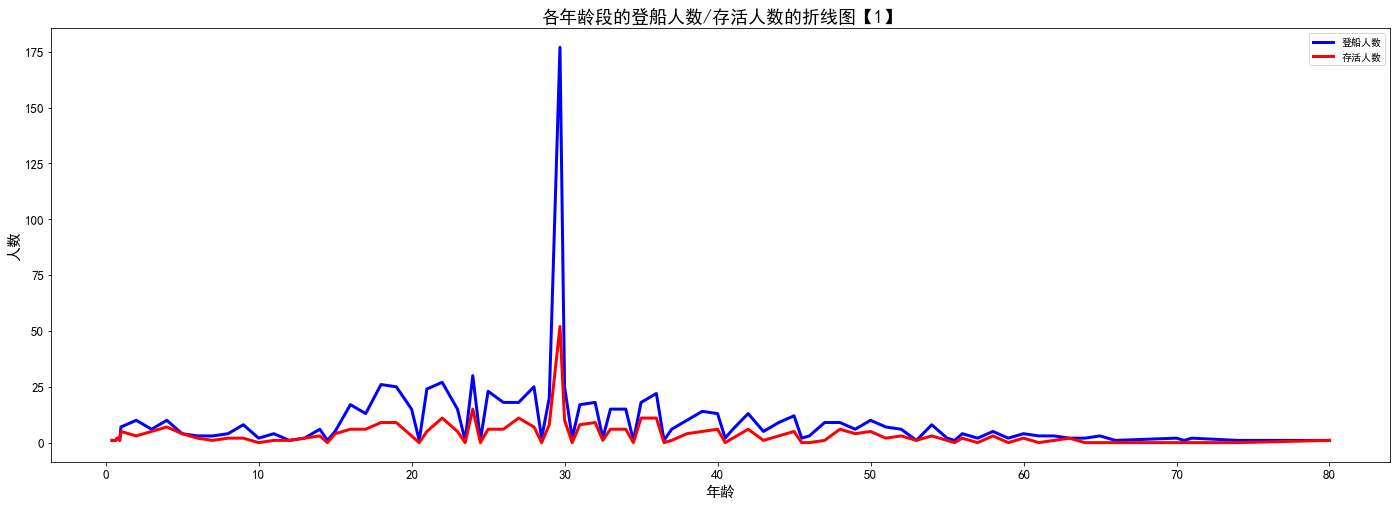

In [138]:
age_Series = data['Age'].value_counts() # 获取各个年龄段的人数
age_Series.sort_index(inplace=True)     # 根据索引的值进行排序
# 获取可视化数据
x = np.array(age_Series.index)
y = np.array(age_Series)
# 各年龄段登船人数可视化
plt.figure(figsize=(24,8))
plt.title('各年龄段的登船人数/存活人数的折线图【1】',fontsize=18)
plt.xlabel('年龄',fontsize=15)
plt.ylabel('人数',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(x,y,color='b',linewidth=3,label='登船人数')

# 各年龄段存活人数可视化
age_Survived_df = data[['Age','Survived']]
age_Survived_df.sort_index(inplace=True)
age_Survived_df = age_Survived_df.groupby(['Age']).sum()       # 获取存活人数
x = np.array(age_Survived_df.index)
y = np.array(age_Survived_df)
plt.plot(x,y,color='r',linewidth=3,label='存活人数')
plt.legend(loc='best')              # 显示线的类型

plt.show()

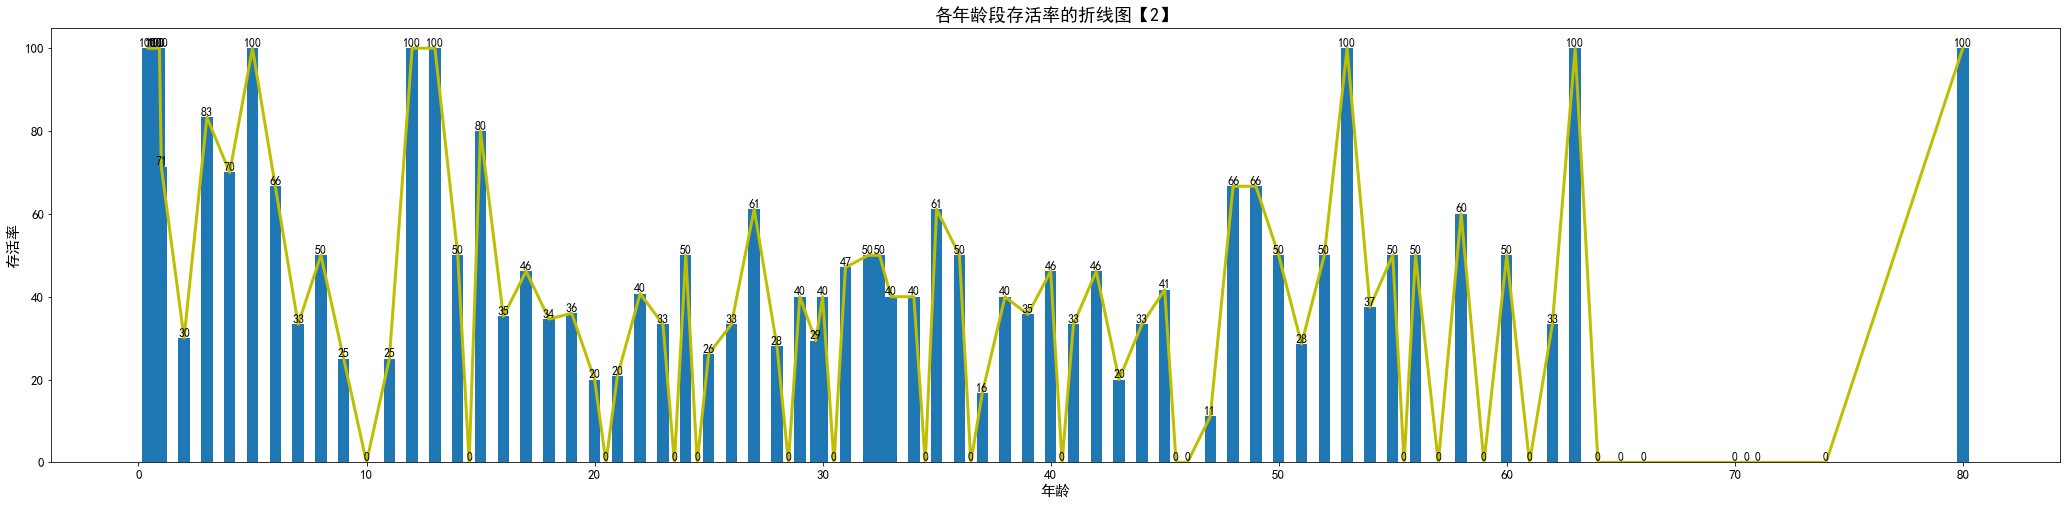

In [139]:
# 获取各个年龄段的存活率
x = np.array(age_Survived_df.index)
y = []
for index in age_Series.index:
    rate = age_Survived_df.loc[index]*100/age_Series.loc[index]
    y.append(rate)
y = np.array(y).reshape(x.shape)

plt.figure(figsize=(36,8))
plt.title('各年龄段存活率的折线图【2】',fontsize=18)
plt.xlabel('年龄',fontsize=15)
plt.ylabel('存活率',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(x,y,color='y',linewidth=3)
plt.bar(x=x,height=y,width=0.5)

# 对每一个点带上值
# plt.text(x,
# 	y,
# 	string,
# 	fontsize=15,
# 	verticalalignment="top",
# 	horizontalalignment="right"
# )
for i in range(len(y)):
    plt.text(x[i],y[i],'%d'%y[i],fontsize=12,ha='center',va='bottom')
plt.show()

In [140]:
# 综合上诉图【1】和图【2】，可知可将年龄聚合为 [ 0~15 , 16~48 , 49~80 ]三个类型
mina = data['Age'].min()
maxa = data['Age'].max()

data['newAge']= (data['Age'] - mina)/(maxa-mina)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,newAge
0,0,3,0,1,22.0,1,0,7.2500,0,0.271174
1,1,1,2,0,38.0,1,0,71.2833,1,0.472229
2,1,3,1,0,26.0,0,0,7.9250,0,0.321438
3,1,1,2,0,35.0,1,0,53.1000,0,0.434531
4,0,3,0,1,35.0,0,0,8.0500,0,0.434531


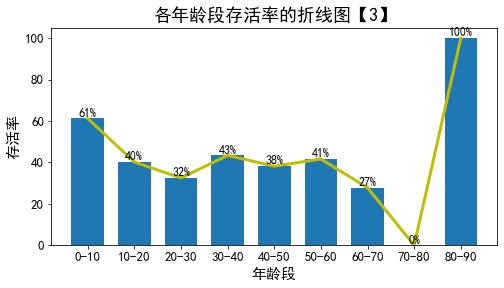

In [141]:
# 再可视化年龄与存活的关系
data['Age'] = data['Age'].apply(lambda x:int(x//10))

age_df = data['Age'].value_counts()
age_df.sort_index(inplace=True)
x = age_df.index
y1 = age_df.values
age_survived_df = data[['Age','Survived']].groupby(['Age']).sum()
age_survived_df.sort_index(inplace=True)
y2 = age_survived_df.values.reshape(x.shape)
y = []
for i in range(len(y1)):
    elem = y2[i]*100/y1[i]
    y.append(elem)

plt.figure(figsize=(8,4))
plt.title('各年龄段存活率的折线图【3】',fontsize=18)
plt.xlabel('年龄段',fontsize=15)
plt.ylabel('存活率',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

tick_label = []
for i in range(0,data['Age'].max()+1):
    age_range = str(i*10)+'-'+str((i+1)*10)
    tick_label.append(age_range)

plt.plot(x,y,color='y',linewidth=3)
plt.bar(x=x,height=y,width=0.7,tick_label=tick_label)
for i in range(len(y)):
    plt.text(x[i],y[i],'%d%%'%y[i],fontsize=12,ha='center',va='bottom')
plt.show()

In [142]:
# 对船费进行离散化
fare_df = data['Fare']              # 船费保留整数
fare_df = pd.DataFrame(fare_df.sort_values())
fare_df.agg(['min','mean','max'])   # 获取船费的最小值、均值、最大值

,Fare
min,0.000000
mean,32.096681
max,512.329200


In [143]:
# 可以看到船费的价格为0~512$$，而均值在31，这表示多数人的船费都是低价、也就是说大部分人都是低等仓
fare_df_count = fare_df.value_counts()
fare_df_count.sort_index(inplace=True)
fare_df_count

Fare    
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 247, dtype: int64

In [144]:
# 根据船仓等级和船费进行分级
fare_Pclass_df = data[['Fare','Pclass']]
fare_Pclass_count = fare_Pclass_df.value_counts()
fare_Pclass_count_df = pd.DataFrame(fare_Pclass_count)
fare_Pclass_count_df.sort_index(inplace=True)
fare_Pclass_count_df

0
Fare     Pclass   
0.0000   1       5
         2       6
         3       4
4.0125   3       1
5.0000   1       1
...             ..
227.5250 1       4
247.5208 1       2
262.3750 1       2
263.0000 1       4
512.3292 1       3

[254 rows x 1 columns]

In [145]:
# 由上诉分组统计来看，船费与船舱等级的关系也不是很大，所以船费不能简单的分为和船舱等级一样，由于船费中有一个数据的大小远远大于其他值，故需要将该值加入到倒数第二个聚类中
minf = data['Fare'].min()
maxf = data['Fare'].max()

data['Fare'] = (data['Fare']-minf)/(maxf-minf)
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,newAge
886,0,2,4,1,2,0,0,0.025374,0,0.334004
887,1,1,1,0,1,0,0,0.058556,0,0.233476
888,0,3,1,0,2,1,2,0.045771,0,0.367921
889,1,1,0,1,2,0,0,0.058556,1,0.321438
890,0,3,0,1,3,0,0,0.015127,2,0.396833


### 将多列的特征关系合并为一个特征关系
- SibSp和Parch的关系其实实质就是家庭人数关系

In [146]:
# 将SibSp和Parch合并后删除原来的列
data['Families'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.drop(['Age'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Fare,Embarked,newAge,Families
0,0,3,0,1,0.014151,0,0.271174,1
1,1,1,2,0,0.139136,1,0.472229,1
2,1,3,1,0,0.015469,0,0.321438,0
3,1,1,2,0,0.103644,0,0.434531,1
4,0,3,0,1,0.015713,0,0.434531,0


## 数据可视化

### 各个特征之间的关系
- 正关系和负关系

In [147]:
# 各特征之间的关联性
data_corr = data.corr()
data_corr

,Survived,Pclass,Name,Sex,Fare,Embarked,newAge,Families
Survived,1.000000,-0.335549,0.413123,-0.541585,0.255290,0.108669,-0.074673,0.018277
Pclass,-0.335549,1.000000,-0.182956,0.127741,-0.548193,0.043835,-0.327954,0.064221
Name,0.413123,-0.182956,1.000000,-0.507372,0.136011,0.052198,-0.103571,0.329592
Sex,-0.541585,0.127741,-0.507372,1.000000,-0.179958,-0.118593,0.089434,-0.203191
Fare,0.255290,-0.548193,0.136011,-0.179958,1.000000,0.063462,0.088604,0.218658
Embarked,0.108669,0.043835,0.052198,-0.118593,0.063462,1.000000,0.009499,-0.081057
newAge,-0.074673,-0.327954,-0.103571,0.089434,0.088604,0.009499,1.000000,-0.247546
Families,0.018277,0.064221,0.329592,-0.203191,0.218658,-0.081057,-0.247546,1.000000


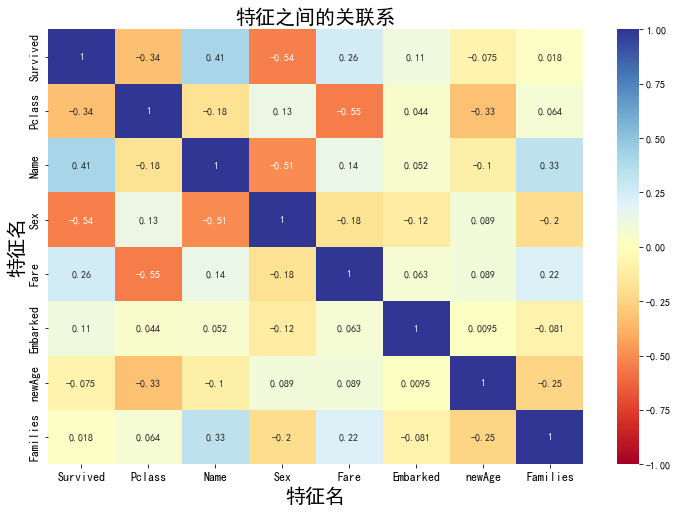

In [148]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.heatmap(data=data_corr,annot=True,vmin=-1,vmax=1,cmap=plt.cm.RdYlBu,xticklabels=data.columns,yticklabels=data.columns)
ax.set_title('特征之间的关联系',fontsize = 20)
ax.set_xlabel('特征名',fontsize = 20)
ax.set_ylabel('特征名',fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 各特征关系之间的有关存活率的散点图

In [149]:
col_names = np.array(data.columns)      # 各特征之间的名称

def getCombination(cols)->list:        # 获取各个特征之间的组合
    combination = []
    length = len(cols)
    for i in range(1,length):
        for j in range(i+1,length):
            elem = [i,j]
            if(elem not in combination):
                combination.append(elem)
    return combination

combination = getCombination(col_names)
combination

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7]]

In [150]:
from sklearn import svm

# 分类边界可视化函数
def classify(df:pd.DataFrame,columns:list,combination:list,color:str,targetIndex:int,label:list,marker:list,clf=svm.SVC(),flag=False,figsize=(16,8),step=0.02,x=1,y=1):
    plt.figure(figsize=figsize)
    pos = 1
    target = np.array(df[columns[targetIndex]])
    for index in combination:
        ax = plt.subplot(x,y,pos)
        pos+=1
        # 得到ndarrar类型的数据
        train = np.array(df[[columns[index[0]],columns[index[1]]]])     # ndarray类型
        if(flag):    
            clf.fit(train,target)
            # 获取特征的最大最小值
            x_min,x_max = train[...,0].min()-1, train[...,0].max()+1        # 只有ndarray类型可以使用这种方法输出元素，list类型只有[slice]即切片类型，dataframe也是只有切片类型
            y_min,y_max = train[...,1].min()-1,  train[...,1].max()+1
            # 获取
            xx,yy = np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
            # 预测数据
            Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)          # 决策边界绘制
            # plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)        # 也是决策边界的绘画
        # 设置xy轴的标签
        plt.xlabel(columns[index[0]])
        plt.ylabel(columns[index[1]])
        # 对于每一种类的花单独画图
        for i, c in zip(range(len(color)), color):          # 画对应的颜色
            idx = np.where(target == i)                     # 返回target数组中 数据==i 的索引值，即返回一个数组，数组中全是值i的索引
            ax.scatter(train[idx, 0], train[idx, 1], c=c,cmap=plt.cm.RdYlBu,marker=marker[i],label=label[i])
            plt.legend(loc='best')
    plt.show()

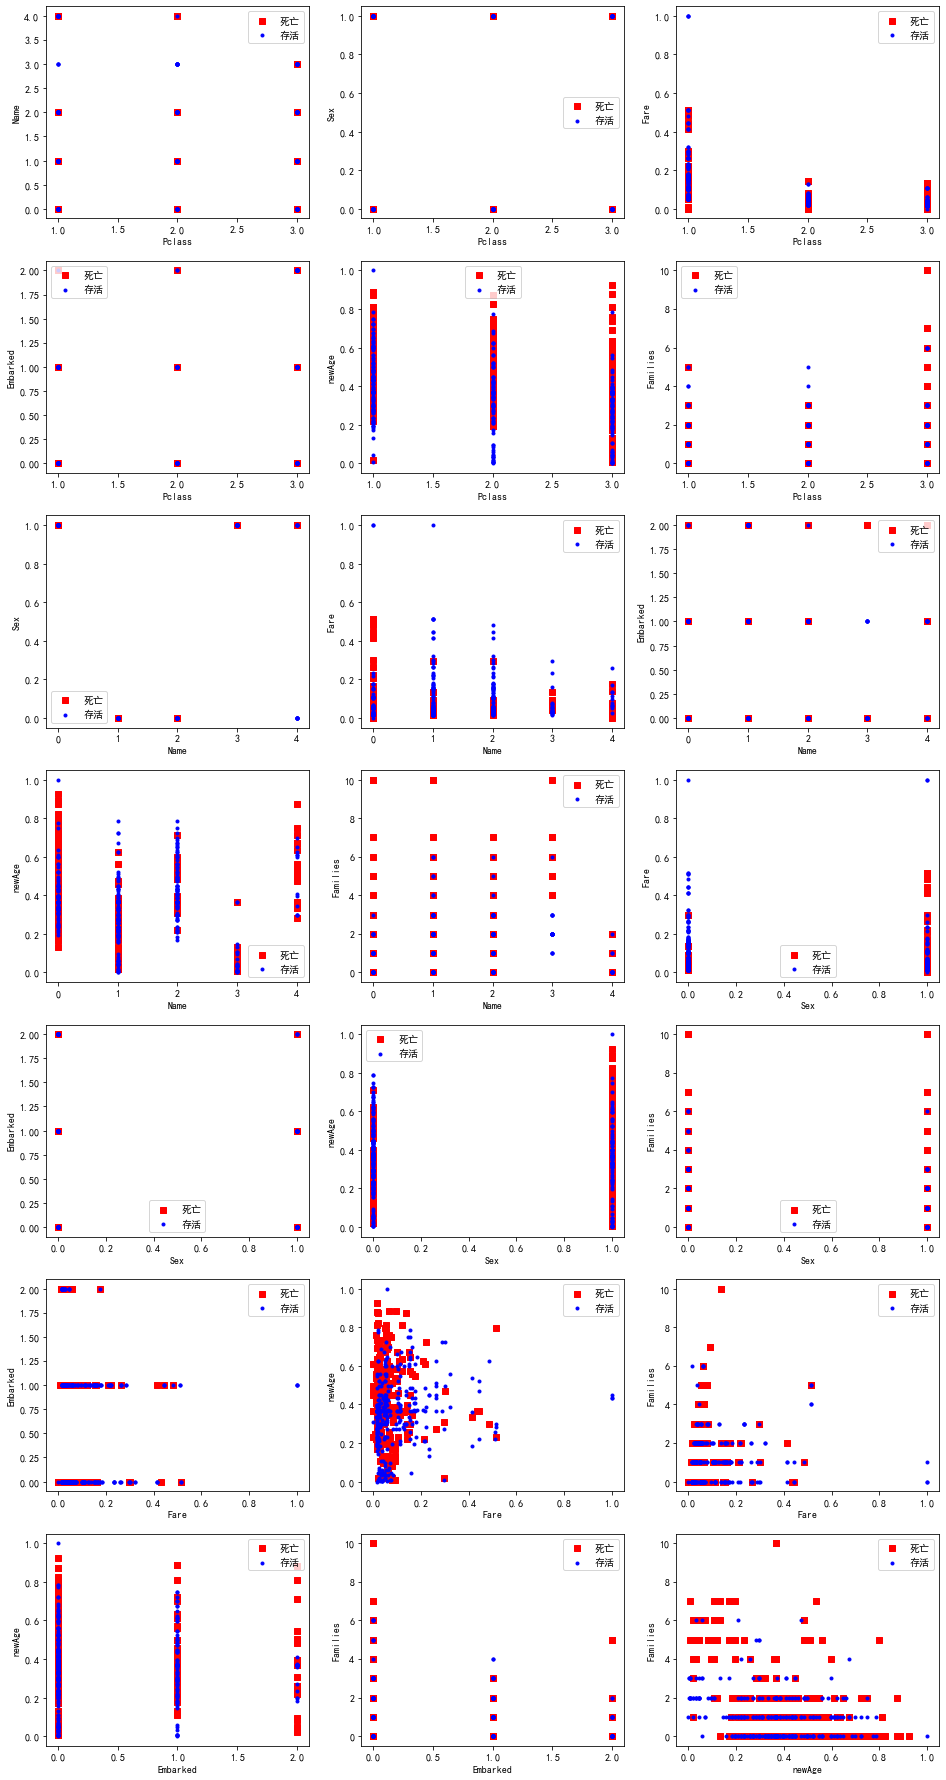

In [155]:
classify(data,data.columns,combination,color='rb',targetIndex=0,label=['死亡','存活'],marker=[',','.'],figsize=(16,32),x=7,y=3)

In [160]:
# 根据上诉可视化发现，不能进行分类边界可视化
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes

X_train,X_test,y_train,y_test = train_test_split(data[data.columns[1:]],data[data.columns[0]],test_size=0.5,random_state=5)

clf = svm.SVC()
clf.fit(X=X_train,y=y_train)
score =  metrics.accuracy_score(y_true=y_test,y_pred=(clf.predict(X_test)))
print(score)

0.851685393258427
